In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import pysat
import pysatSpaceWeather

In [2]:
# Set a directory for pysat to use for data
pysat.params['data_dirs'] = '~/pysatDemo'

In [3]:
# Register instruments with pysat. Only needed once per install.
pysat.utils.registry.register_by_module(pysatSpaceWeather.instruments)

In [4]:
# Instantiate a pysat Instrument that will use support in 
# pysatSpaceWeather for ACE Space Weather data.
ace = pysat.Instrument('ace', 'sis', tag='historic')

In [5]:
def calc_ratio(inst):
    """Calculate ratio of 30 MeV / 10 MeV flux.
    
    Adds ratio in-place via label `ratio_30_10`
    
    Parameters
    ----------
    inst : pysat.Instrument
    
    """
    
    # Calculate ratio
    var1 = 'int_pflux_30MeV'
    var2 = 'int_pflux_10MeV'
    inst['ratio_30_10'] = inst[var1] / inst[var2]
    
    # Define then assign metadata
    desc = 'Ratio of integrated proton flux, 30 MeV / 10 MeV.'
    name = 'Ratio of 30 MeV / 10 MeV Proton Flux'
    meta = {inst.meta.labels.units: '', 
            inst.meta.labels.name: name,
            inst.meta.labels.desc: desc,
            inst.meta.labels.min_val: 0., 
            inst.meta.labels.max_val: np.inf, 
            inst.meta.labels.fill_val: np.nan}
    inst.meta['ratio_30_10'] = meta
    
    return

# Assign `calc_ratio` to `ace` which is applied 
# automatically as data loaded.
ace.custom_attach(calc_ratio)

In [6]:
# Download data for July, 2021
ace.download(dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 31))

In [7]:
# Load all data which applies any custom functions, in this case
# `calc_ratio`. Any analysis functions that interact with `ace`
# will have access to any custom user generated variables.
ace.load()

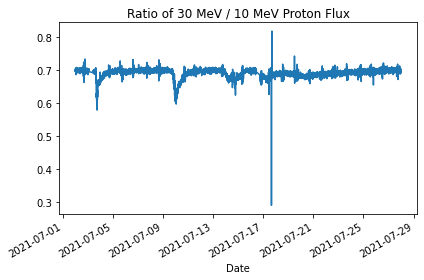

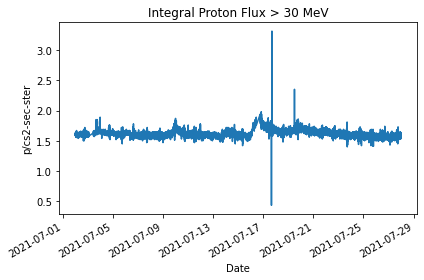

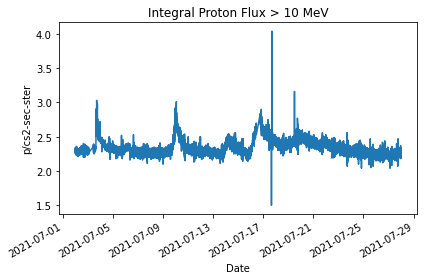

In [8]:
# Make plot of flux ratio and direct integrated fluxes for July, 2021
sdate = dt.datetime(2021, 7, 2)
edate = dt.datetime(2021, 7, 28)
variables = ['ratio_30_10', 'int_pflux_30MeV', 'int_pflux_10MeV']
for var in variables:
    plt.figure()
    units = ace.meta[var, ace.meta.labels.units]
    title = ace.meta[var, ace.meta.labels.name]

    ace[sdate:edate, var].plot(title=title, ylabel=units, 
                               xlabel='Date')
    plt.tight_layout()
    plt.savefig(''.join([var, '_example.jpg']))
